<a href="https://colab.research.google.com/github/santhoshchakilamcs/Lending-Club/blob/master/Santhosh_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving LoanStats3a.csv to LoanStats3a.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['LoanStats3a.csv']))
# Dataset is now stored in a Pandas Dataframe

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Question 1)

From a large dataset, i have taken 3 features of date.


In [4]:
df = df[['earliest_cr_line','last_pymnt_d','last_credit_pull_d']]

In [5]:
df

,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,Jan-85,Jan-15,May-19
1,Apr-99,Apr-13,Oct-16
2,Nov-01,Jun-14,Jun-17
3,Feb-96,Jan-15,Apr-16
4,Jan-96,Jan-17,Apr-18
...,...,...,...
42533,NaN,Mar-08,Feb-13
42534,NaN,Jun-10,Sep-14
42535,NaN,Jun-10,May-07
42536,NaN,Jun-10,Aug-07


Filling the null values with mode as there are less than 1% of null values and converting the object features to date features.


In [6]:
def fun(x):
  for i in x:
    df[i] = pd.to_datetime(df[i].str.upper(), format='%b-%y', yearfirst=False)
  for j in x:
    df[j] =  df[j].fillna(df[j].mode()[0])
fun(df)

In [7]:
df

,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2015-01-01,2019-05-01
1,1999-04-01,2013-04-01,2016-10-01
2,2001-11-01,2014-06-01,2017-06-01
3,1996-02-01,2015-01-01,2016-04-01
4,1996-01-01,2017-01-01,2018-04-01
...,...,...,...
42533,1999-10-01,2008-03-01,2013-02-01
42534,1999-10-01,2010-06-01,2014-09-01
42535,1999-10-01,2010-06-01,2007-05-01
42536,1999-10-01,2010-06-01,2007-08-01


Subtraction of date features. As we will get negative days i used absolute to make it positive days.

In [8]:
df['ear-pymnt'] = df['earliest_cr_line'].sub(df['last_pymnt_d'], axis=0).abs()
df['pymnt-credit'] = df['last_pymnt_d'].sub(df['last_credit_pull_d'], axis=0).abs()
df['ear-credit'] = df['earliest_cr_line'].sub(df['last_credit_pull_d'], axis=0).abs()

In [9]:
df

,earliest_cr_line,last_pymnt_d,last_credit_pull_d,ear-pymnt,pymnt-credit,ear-credit
0,1985-01-01,2015-01-01,2019-05-01,10957 days,1581 days,12538 days
1,1999-04-01,2013-04-01,2016-10-01,5114 days,1279 days,6393 days
2,2001-11-01,2014-06-01,2017-06-01,4595 days,1096 days,5691 days
3,1996-02-01,2015-01-01,2016-04-01,6909 days,456 days,7365 days
4,1996-01-01,2017-01-01,2018-04-01,7671 days,455 days,8126 days
...,...,...,...,...,...,...
42533,1999-10-01,2008-03-01,2013-02-01,3074 days,1798 days,4872 days
42534,1999-10-01,2010-06-01,2014-09-01,3896 days,1553 days,5449 days
42535,1999-10-01,2010-06-01,2007-05-01,3896 days,1127 days,2769 days
42536,1999-10-01,2010-06-01,2007-08-01,3896 days,1035 days,2861 days


Question 2)

In [62]:
df1 = pd.read_csv(io.BytesIO(uploaded['LoanStats3a.csv']))

In [63]:
df1 = df1[['annual_inc','grade']]

In [64]:
df1

,annual_inc,grade
0,24000.0,B
1,30000.0,C
2,12252.0,C
3,49200.0,C
4,80000.0,B
...,...,...
42533,180000.0,C
42534,12000.0,B
42535,110000.0,B
42536,NaN,A


In [65]:
df1.isnull().sum()

annual_inc    7
grade         3
dtype: int64

In [66]:
df1['annual_inc'].fillna(df1['annual_inc'].mean(),inplace=True)
df1['grade'].fillna(df1['grade'].mode(),inplace=True)

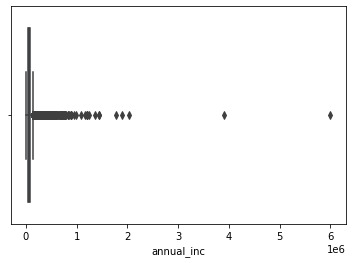

In [67]:
sns.boxplot(df1['annual_inc'])
plt.show()

checking for left skewness and right skewness then performing transformation so that the distribution will be normal.

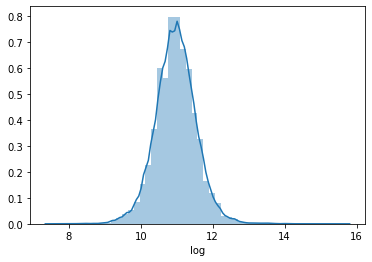

In [68]:
import warnings
warnings.simplefilter(action='ignore')

def funt(y):
  y = y.select_dtypes(exclude=['object','category'])
  for i in y:
    if y[i].mean() < y[i].median():
      y['square'] = np.square(df1[i])
      sns.distplot(y['square'])
      plt.show()
    elif y[i].mean() > y[i].median():
      y['log'] = np.log(y[i])
      sns.distplot(y['log'])
      plt.show()
    else:
      sns.distplot(y)
funt(df1)


Question 3)

In [69]:
df2 = pd.read_csv(io.BytesIO(uploaded['LoanStats3a.csv']))

In [73]:
df2 = df2[['loan_amnt','installment','grade','annual_inc','revol_util']]

In [74]:
df2.isnull().sum()

loan_amnt       3
installment     3
grade           3
annual_inc      7
revol_util     93
dtype: int64

In [75]:
def fun(x):
  for j in x:
    df2[j] =  df2[j].fillna(df2[j].mode()[0])
fun(df2)

In [76]:
df2.isnull().sum()

loan_amnt      0
installment    0
grade          0
annual_inc     0
revol_util     0
dtype: int64

In [92]:
def funt(y):
  # Create correlation matrix
  corr_matrix = y.corr().abs()
  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
  # Find index of feature columns with correlation greater than 0.85
  to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
  # feature droping
  y.drop(y[to_drop], axis=1,inplace=True)
      
funt(df2)


In [93]:
df2

,loan_amnt,grade,annual_inc,revol_util
0,5000.0,B,24000.0,83.70%
1,2500.0,C,30000.0,9.40%
2,2400.0,C,12252.0,98.50%
3,10000.0,C,49200.0,21%
4,3000.0,B,80000.0,53.90%
...,...,...,...,...
42533,3500.0,C,180000.0,0%
42534,1000.0,B,12000.0,0%
42535,2525.0,B,110000.0,0%
42536,6500.0,A,60000.0,0%
